In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
#Load the Datasets
df = pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
print(f"Total Columns of this dataset is {df.shape[1]} and the Total Row is {df.shape[0]}.")

Total Columns of this dataset is 16 and the Total Row is 29531.


In [5]:
print("\nLets Describe the Dataset Values.\n")
df.describe()


Lets Describe the Dataset Values.



,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
#lets check the null values and also fillup the null values.
print("Check the Null values and resolve it.")

df.isnull().sum()

Check the Null values and resolve it.


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [8]:
print("Lets Resolve the Missing Values.\n")
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].mean())

Lets Resolve the Missing Values.



In [9]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [10]:
#Lets Change the Data Columns into this Datasets into saperate like Day,Month,Year wise.

if "Date" in df.columns:

    #First weare change the type of th Date object into Date formate.
    df["Date"] = pd.to_datetime(df["Date"],errors='coerce')
    
    df["Month"] = df["Date"].dt.month
    df["Year"] = df["Date"].dt.year
    df["Day"] = df["Date"].dt.dayofweek

In [11]:
#Lets Delete the Date Column.
df.drop(columns ="Date",axis=1)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year,Day
0,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate,1,2015,3
1,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate,1,2015,4
2,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate,1,2015,5
3,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate,1,2015,6
4,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate,1,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good,6,2020,5
29527,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory,6,2020,6
29528,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory,6,2020,0
29529,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory,6,2020,1


In [12]:
#Reindex The Columns

print("Lets rearrange the Order of the Column into this dataset.")

new_order = ['City','Day','Month','Year','PM2.5', 'PM10','NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene','AQI', 'AQI_Bucket']

#We Are use the .reindex Function fir the Reindexing the Columns.
df = df.reindex(columns=new_order)

Lets rearrange the Order of the Column into this dataset.


In [15]:
print("\nLets Check the Reindexed Datasets.\n")
df.head(10)


Lets Check the Reindexed Datasets.



,City,Day,Month,Year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,3,1,2015,67.450578,118.127103,0.92000,18.22,17.15,23.483476,0.920000,27.64,133.36,0.00,0.02,0.00,166.463581,Moderate
1,Ahmedabad,4,1,2015,67.450578,118.127103,0.97000,15.69,16.46,23.483476,0.970000,24.55,34.06,3.68,5.50,3.77,166.463581,Moderate
2,Ahmedabad,5,1,2015,67.450578,118.127103,17.40000,19.30,29.70,23.483476,17.400000,29.07,30.70,6.80,16.40,2.25,166.463581,Moderate
3,Ahmedabad,6,1,2015,67.450578,118.127103,1.70000,18.48,17.97,23.483476,1.700000,18.59,36.08,4.43,10.14,1.00,166.463581,Moderate
4,Ahmedabad,0,1,2015,67.450578,118.127103,22.10000,21.42,37.76,23.483476,22.100000,39.33,39.31,7.01,18.89,2.78,166.463581,Moderate
5,Ahmedabad,1,1,2015,67.450578,118.127103,45.41000,38.48,81.50,23.483476,45.410000,45.76,46.51,5.42,10.83,1.93,166.463581,Moderate
6,Ahmedabad,2,1,2015,67.450578,118.127103,112.16000,40.62,130.77,23.483476,112.160000,32.28,33.47,0.00,0.00,0.00,166.463581,Moderate
7,Ahmedabad,3,1,2015,67.450578,118.127103,80.87000,36.74,96.75,23.483476,80.870000,38.54,31.89,0.00,0.00,0.00,166.463581,Moderate
8,Ahmedabad,4,1,2015,67.450578,118.127103,29.16000,31.00,48.00,23.483476,29.160000,58.68,25.75,0.00,0.00,0.00,166.463581,Moderate
9,Ahmedabad,5,1,2015,67.450578,118.127103,17.57473,7.04,0.00,23.483476,2.248598,8.29,4.55,0.00,0.00,0.00,166.463581,Moderate


Lets Check the Outliers of the all Columns.



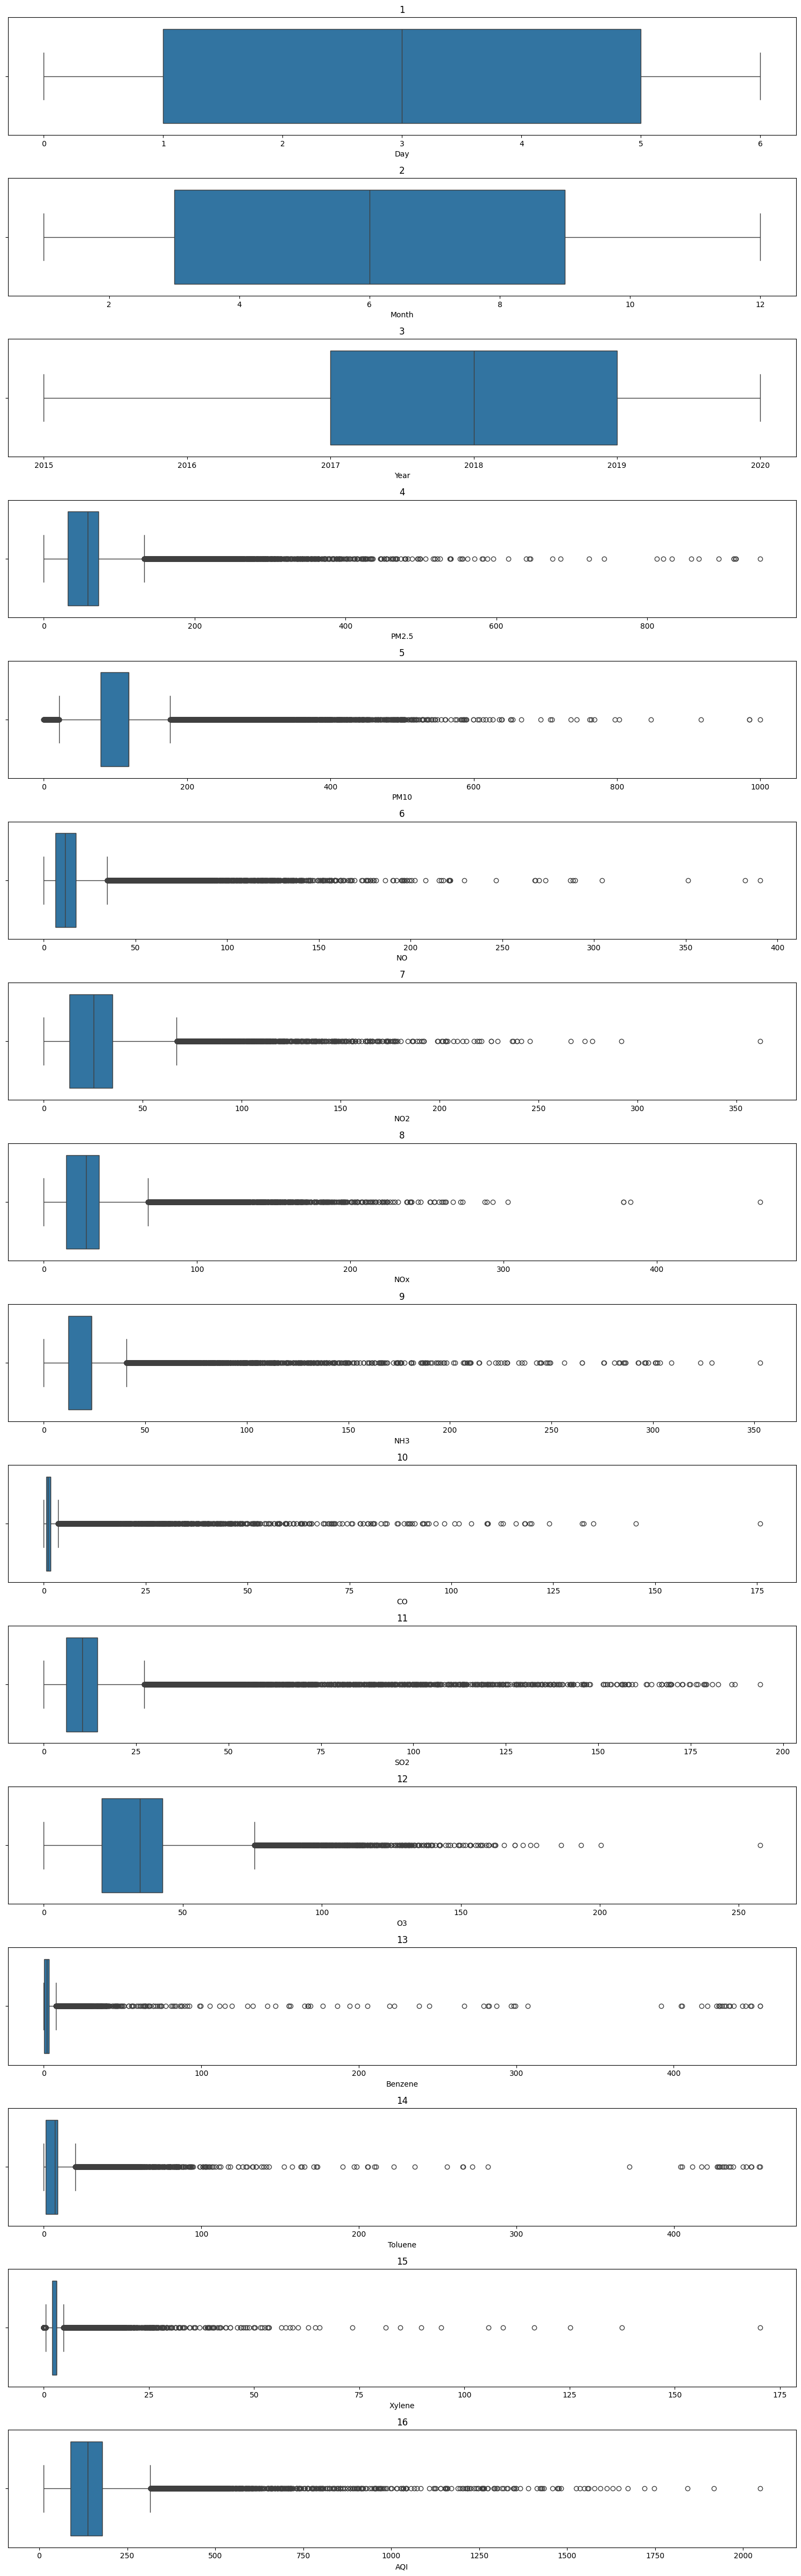

In [16]:
#Check the Outliers and remove the Outliers Using the IQR Method.

print("Lets Check the Outliers of the all Columns.\n")
temp2 = [] #Numaric feture Columns
temp3 = [] #objects feture Columns

#Saperate the Numaric and Object Columns
for i in df.columns:
    if df[i].dtype == 'object':
        temp3.append(i)
    else:
        temp2.append(i)

#Display all the Numaric Columns Outliers.
plt.figure(figsize=(15, 3 * len(temp2)))
for j in range(1,len(temp2)+1):
    plt.subplot(len(temp2),1,j)
    sns.boxplot(x=temp2[j-1],data=df)
    plt.title(f"{j}")
plt.tight_layout()
plt.show()

In [17]:
print("\nLets Remove the Outliers from this dataset.\n")
print("\n We are use the IQR Method for removing the outliers.\n")

for i in temp2:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3 - q1

    min_range = q1 - (1.5*IQR)
    max_range = q3 + (1.5*IQR)

    df =df[(df[i] >= min_range) & (df[i] <= max_range)]


Lets Remove the Outliers from this dataset.


 We are use the IQR Method for removing the outliers.




Lets Check after removing a outliers.



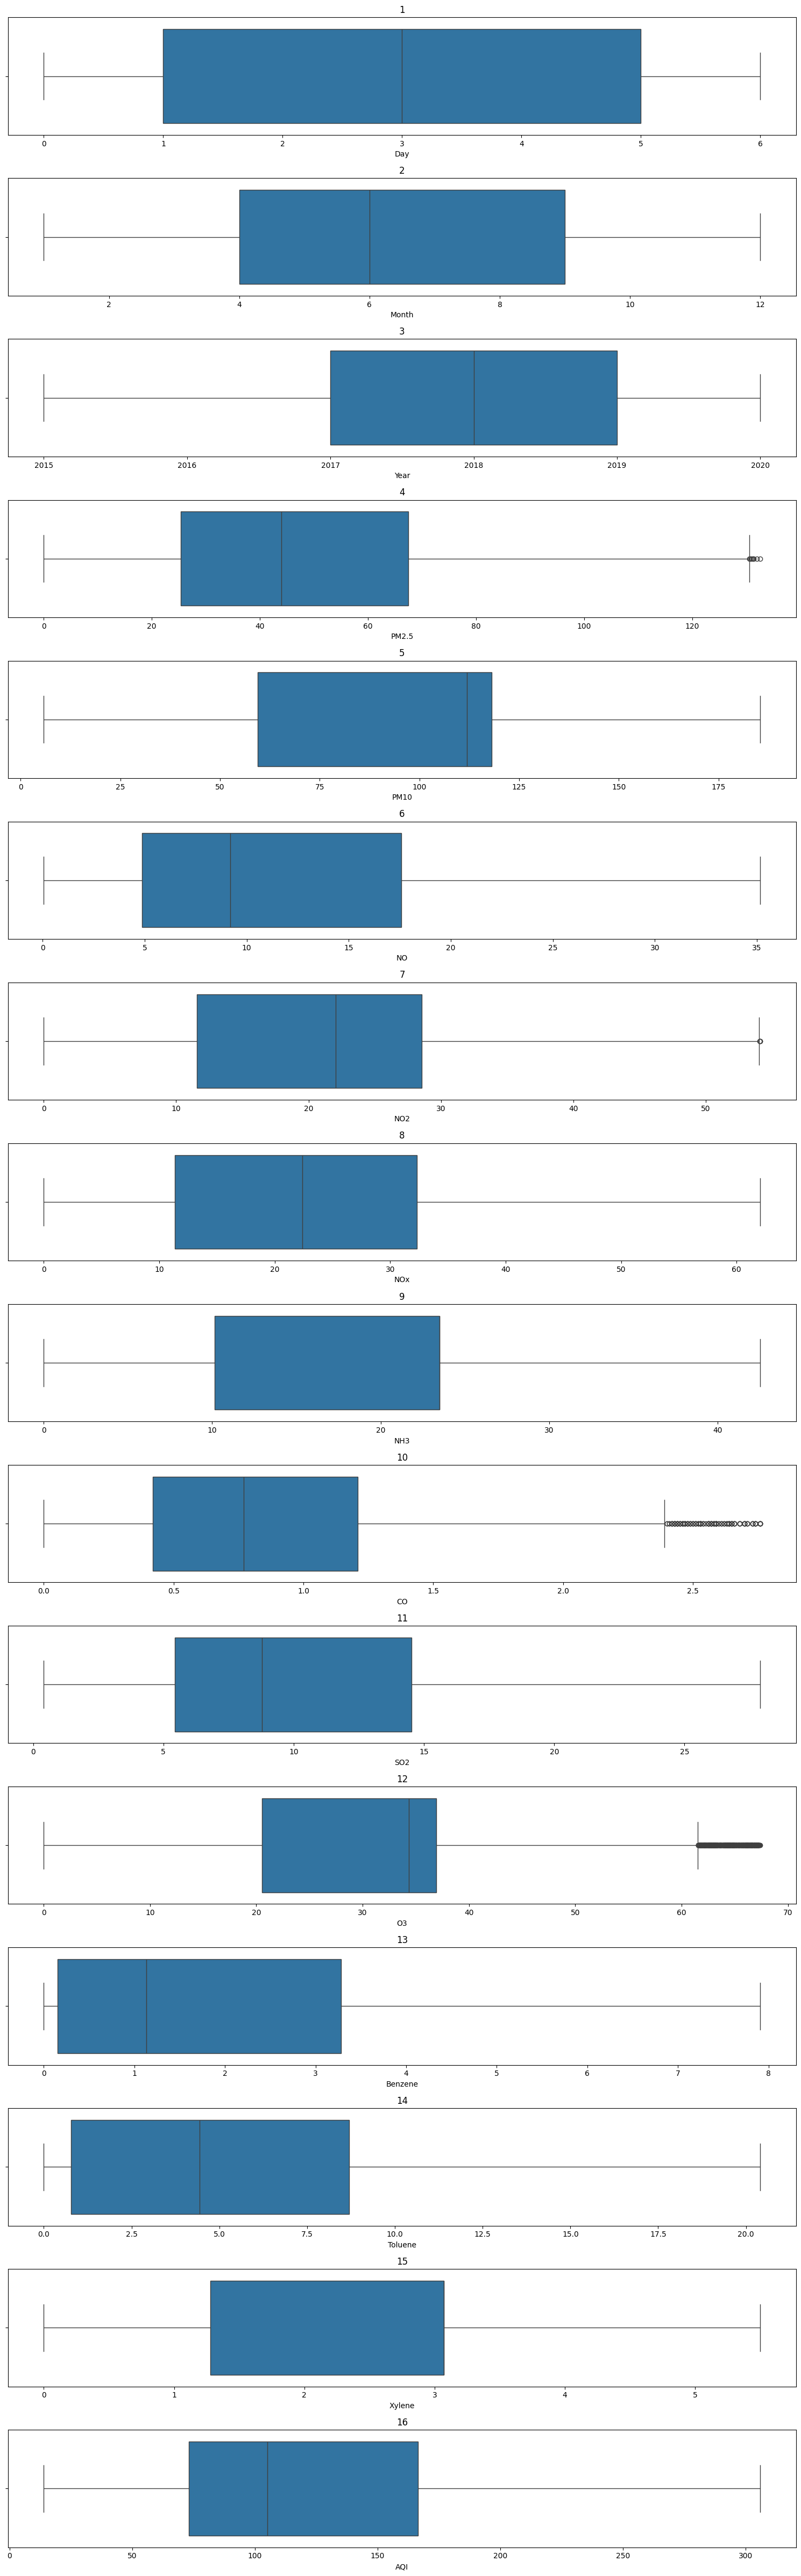

In [18]:
#Check the Removed Outliers.

print("\nLets Check after removing a outliers.\n")

plt.figure(figsize=(15, 3 * len(temp2)))
for j in range(1,len(temp2)+1):
    plt.subplot(len(temp2),1,j)
    sns.boxplot(x=temp2[j-1],data=df)
    plt.title(f"{j}")
plt.tight_layout()
plt.show()

In [15]:
#Convert the Catagoricle Data into the Numaric Data
print("\nLets Encode the Catagoricle Data into the Numaricle formate.\n")
lb = LabelEncoder()

for i in temp3:
    df[i] = lb.fit_transform(df[i])


Lets Encode the Catagoricle Data into the Numaricle formate.



In [16]:
df.head(3)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1,0,1,67.450578,118.127103,0.97000,15.69,16.46,23.483476,0.970000,24.55,34.06,3.68,5.50,3.77,166.463581,1
3,0,3,67.450578,118.127103,1.70000,18.48,17.97,23.483476,1.700000,18.59,36.08,4.43,10.14,1.00,166.463581,1
9,0,9,67.450578,118.127103,17.57473,7.04,0.00,23.483476,2.248598,8.29,4.55,0.00,0.00,0.00,166.463581,1


In [30]:
df['AQI_Bucket'].unique()

array([1, 2, 3, 0, 4])